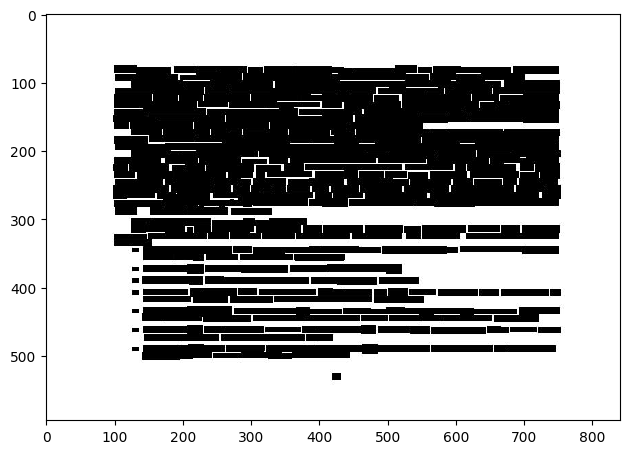

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

img = cv2.imread('./../../docbank_processed/processed_data/cage_results/106.tar_1705.06909.gz_KGBR5_4_ori_pro.jpg')
img2 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,1,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

io.imshow(img)

2056


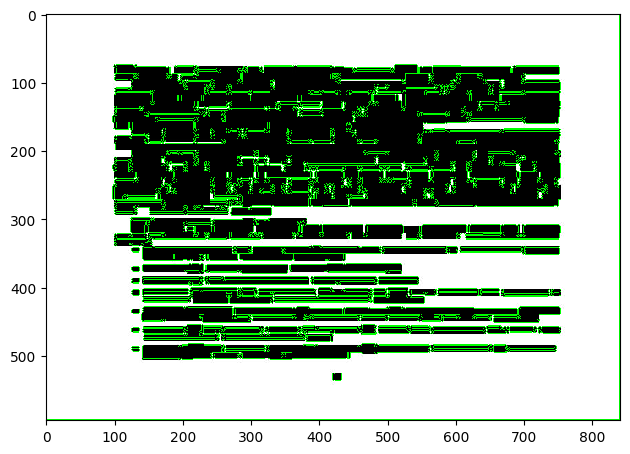

In [2]:
print(len(contours))
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
#     print(x, y, w, h)
    cv2.drawContours(img, contours, i, (0,255,0))
    
io.imshow(img)

In [48]:
import pickle
import cv2
import numpy as np

In [56]:
with open('./../../docbank_processed/processed_data/results/100.tar_1705.04261.gz_main_11__results.pkl', 'rb') as f:
    results = pickle.load(f)

img = cv2.imread('./../../docbank_processed/processed_data/spear_ori_black/100.tar_1705.04261.gz_main_11_ori_pro.jpg')

x,y,_ = img.shape

results = results.reshape(x,y)

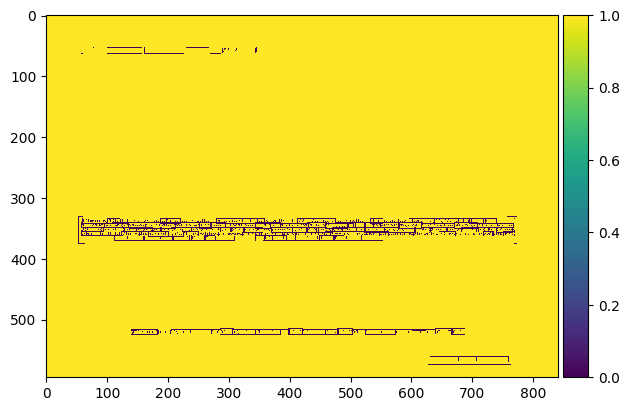

In [59]:
io.imshow(results)

In [ ]:
temp = False
ans = []


for i in range(len(results)):
    value = []
    if(temp==True)
    for j in range(len(results[0])):
        if(results[i][j]==True):
            temp = True
        
        if(temp==True):
            value.append(True)

In [18]:
np.unique(results)

array([0, 1])

In [33]:
results = results.astype(np.bool) 

/tmp/ipykernel_714575/1983177112.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  results = results.astype(np.bool)


In [20]:
results

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [34]:
from skimage import io

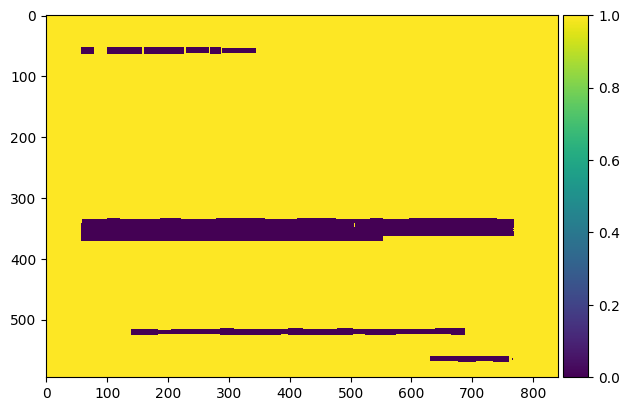

In [55]:
io.imshow(results)

In [47]:

from PIL import Image, ImageFilter
 
 
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"ex.jpg")
 
# Converting the image to grayscale, as edge detection
# requires input image to be of mode = Grayscale (L)
image = image.convert("L")
 
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
 
# Saving the Image Under the name Edge_Sample.png
image.save(r"Edge_Sample.png")

In [44]:
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.morphology import medial_axis, skeletonize


skel, distance = medial_axis(results, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(results)
skeleton_lee = skeletonize(results, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

/home/venkat/BADRI/venv/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


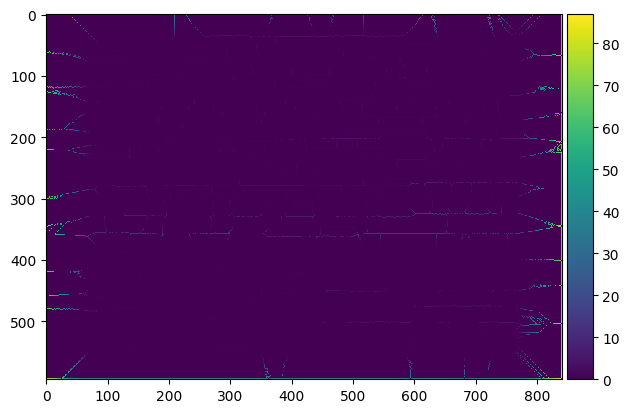

In [45]:
io.imshow(dist_on_skel)

In [23]:
io.imsave('ex.jpg',results)

/tmp/ipykernel_714575/2310422449.py:1: UserWarning: ex.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('ex.jpg',results)


In [24]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [26]:
model = ocr_predictor(pretrained=True)

/home/venkat/BADRI/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/venkat/BADRI/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [27]:
doc = DocumentFile.from_images('ex.jpg')
result = model(doc)

In [37]:
import numpy as np
import cv2 as cv
img = cv.imread('ex.jpg',0)
ret,thresh = cv.threshold(img,127,255,0)
im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

ValueError: not enough values to unpack (expected 3, got 2)

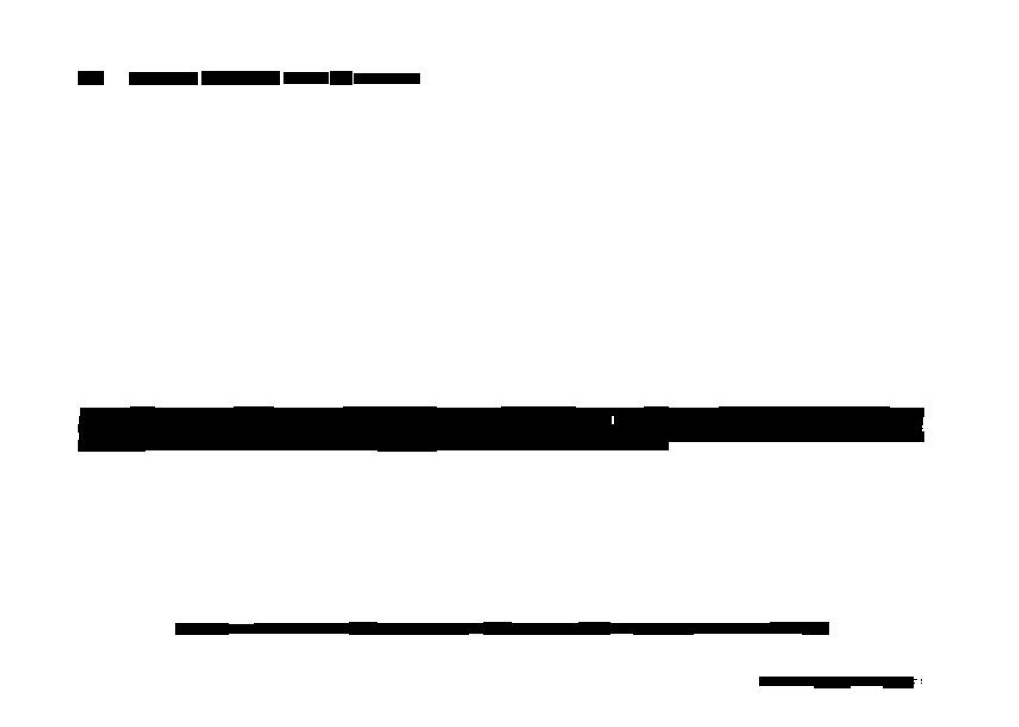

In [28]:
result.show(doc)